# 1. Предсказание цены на недвижимость

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
from pylab import rcParams
rcParams['figure.figsize'] = (9, 6)

In [2]:
import numpy as np

### Данные

в sklearn есть модуль, содержащий набор классических датасетов, воспользуемся им:

In [3]:
from sklearn.datasets import load_boston

In [4]:
print(load_boston()['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [5]:
X, y = load_boston(return_X_y = True)

In [11]:
len(X)

506

In [7]:
y.shape

(506,)

### Формирование выборок

разделим данные на 2 части, обучающую и тренировочную выборки:
1. фиксируем размер обучающей выборки
2. выделяем подмассивы данных из X, y

In [17]:
val = 0.8
point = int(val * len(X))
X_train = X[:point]
X_test = X[point:]
y_train = y[:point]
y_test = y[point:]
X_train.shape

(404, 13)

### Построение регрессии и предсказания по тестовой выборке

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()

In [22]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
y_pred = lr.predict(X_test)

In [25]:
y_pred.shape

(102,)

### Оценка

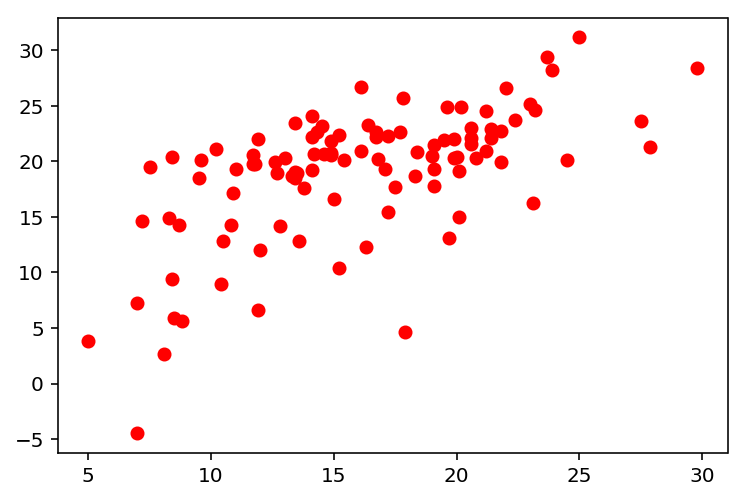

In [27]:
plt.plot(y_test, y_pred, 'ro')

18.91506943077615

### MSE

MSE - среднеквардратичная ошибка, т.е. среднее значение суммы квадратов ошибок

In [31]:
MSE = 0
for i in range(len(y_pred)):
    MSE += (y_pred[i] - y_test[i])**2
MSE = MSE/len(y_pred)

In [32]:
MSE

33.07562649227766

In [33]:
np.mean((y_test-y_pred)**2)

33.07562649227766